In [7]:
import random
import math
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

In [14]:
x=np.linspace(0, 10, 100)
k=5
# y=np.array()
y=((x**(k/2-1))*np.exp(-x/2))/((2**(k/2))*gamma(k/2))

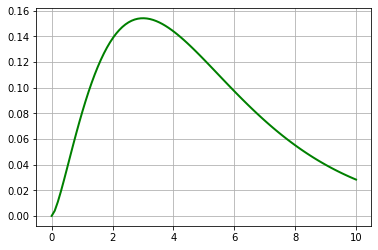

In [15]:
plt.plot(x, y, "g", linewidth=2)
plt.grid(True)
plt.show()